피마족 인디언 당뇨병 발병 유무를 예측하는 이진 분류 문제(1: 당뇨병 / 0: 정상)

## 데이터 준비하기

In [1]:
# 라이브러리 임포트
import numpy as np
import tensorflow as tf

from keras.models import Sequential
from keras.layers import Dense

# 랜덤 시드 고정시키기
np.random.seed(5)

In [2]:
dataset = np.loadtxt('/content/diabetes.csv', delimiter=',' , skiprows=1)
dataset

# 내 데이터 셋이 전부 숫자이므로 numpy로 불러올 수 있다.
# loadtxt()를 활용하여 처음부터 넘파이 배열로 가져올 수 있음
# 스케일 조정을 해서 성능을 향상시킬 수 있음

array([[  6.   , 148.   ,  72.   , ...,   0.627,  50.   ,   1.   ],
       [  1.   ,  85.   ,  66.   , ...,   0.351,  31.   ,   0.   ],
       [  8.   , 183.   ,  64.   , ...,   0.672,  32.   ,   1.   ],
       ...,
       [  5.   , 121.   ,  72.   , ...,   0.245,  30.   ,   0.   ],
       [  1.   , 126.   ,  60.   , ...,   0.349,  47.   ,   1.   ],
       [  1.   ,  93.   ,  70.   , ...,   0.315,  23.   ,   0.   ]])

## 데이터 셋 생성하기 
- 입력(속성값 8개), 출력(당뇨병 결과 1개) 변수로 분리하기

In [3]:
# 학습 데이터
# X_train에 학습 데이터 700개와 8개 변수 가져오기
X_train = dataset[:700, 0:8]
y_train = dataset[:700, 8]

# test 데이터 68개와 1개 변수 가져오기
X_test = dataset[700:, 0:8]
y_test = dataset[700:, 8]


## 모델 구성하기

In [4]:
model = Sequential()
model.add(Dense(12, input_dim=8, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# 이진분류이기 때문에 1개의 출력이 나와야 한다.

In [5]:
# 모델 확인하기
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 12)                108       
_________________________________________________________________
dense_1 (Dense)              (None, 8)                 104       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 9         
Total params: 221
Trainable params: 221
Non-trainable params: 0
_________________________________________________________________


## 모델 학습과정 설정하기

In [6]:
model.compile(loss='binary_crossentropy', 
              optimizer='adam', 
              metrics=['accuracy'])

## 모델 학습 시키기

In [7]:
history = model.fit(X_train, y_train, 
                    epochs=1500,
                    batch_size=64)

# loss가 떨어지는가?? 
# accuracy가 올라가는가??
# -- 정답과 가까워지고 있다.

Epoch 1/1500
11/11 [==============================] - 13s 2ms/step - loss: 47.3301 - accuracy: 0.3530
Epoch 2/1500
11/11 [==============================] - 0s 2ms/step - loss: 38.8232 - accuracy: 0.3525
Epoch 3/1500
11/11 [==============================] - 0s 2ms/step - loss: 32.2389 - accuracy: 0.3646
Epoch 4/1500
11/11 [==============================] - 0s 2ms/step - loss: 25.8692 - accuracy: 0.3609
Epoch 5/1500
11/11 [==============================] - 0s 2ms/step - loss: 18.0890 - accuracy: 0.3512
Epoch 6/1500
11/11 [==============================] - 0s 2ms/step - loss: 9.4506 - accuracy: 0.4021
Epoch 7/1500
11/11 [==============================] - 0s 2ms/step - loss: 2.1761 - accuracy: 0.6145
Epoch 8/1500
11/11 [==============================] - 0s 2ms/step - loss: 2.1984 - accuracy: 0.6687
Epoch 9/1500
11/11 [==============================] - 0s 2ms/step - loss: 1.3171 - accuracy: 0.6360
Epoch 10/1500
11/11 [==============================] - 0s 2ms/step - loss: 1.2201 - accuracy: 

## 학습결과 그려보기

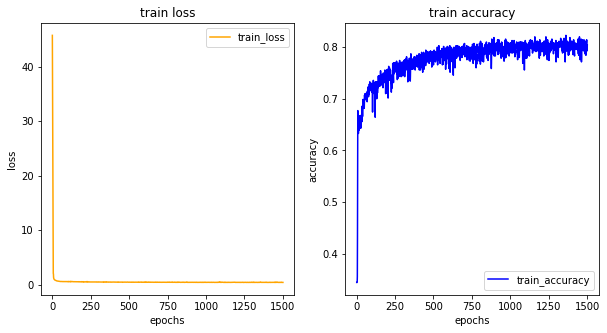

In [8]:
import matplotlib.pyplot as plt

his_dict = history.history
loss = his_dict['loss']

epochs = range(1, len(loss) + 1)
fig = plt.figure(figsize = (10, 5))

# 훈련 및 검증 손실 그리기
ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(epochs, loss, color = 'orange', label = 'train_loss')
ax1.set_title('train loss')
ax1.set_xlabel('epochs')
ax1.set_ylabel('loss')
ax1.legend()

acc = his_dict['accuracy']

# 훈련 및 검증 정확도 그리기
ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(epochs, acc, color = 'blue', label = 'train_accuracy')
ax2.set_title('train accuracy')
ax2.set_xlabel('epochs')
ax2.set_ylabel('accuracy')
ax2.legend()

plt.show()


## 모델 평가하기

In [9]:
scores = model.evaluate(X_test, y_test)
print("%s: %.2f%%" %(model.metrics_names[1], scores[1]*100))

3/3 [==============================] - 1s 4ms/step - loss: 0.5752 - accuracy: 0.7647
accuracy: 76.47%


In [10]:
# 테스트 성능이 높으려면 테스트 데이터 셋이 많아야 한다.

## 모델 성능 평가

In [11]:
# ROC 커브 그려보기

def plot_auc_roc(model):
    probs = model.predict_classes(X_test)
    fpr, tpr, threshold = metrics.roc_curve(y_test, probs)
    roc_auc = metrics.auc(fpr, tpr)

    # method I: plt
    import matplotlib.pyplot as plt
    plt.title('Receiver Operating Characteristic')
    plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()


## 모델 예측하기

In [ ]:
result = model.predict_classes(X_test)
# predict_classes()는 0과 1로 알려주는 함수
result

In [13]:
from sklearn import metrics
report = metrics.classification_report(y_test, result)
print(report)

              precision    recall  f1-score   support

         0.0       0.76      0.90      0.82        41
         1.0       0.79      0.56      0.65        27

    accuracy                           0.76        68
   macro avg       0.77      0.73      0.74        68
weighted avg       0.77      0.76      0.75        68



In [14]:
# precision, recall 출력하기


print(metrics.precision_score(y_test, result))
print(metrics.recall_score(y_test, result))

0.7894736842105263
0.5555555555555556


/usr/local/lib/python3.7/dist-packages/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


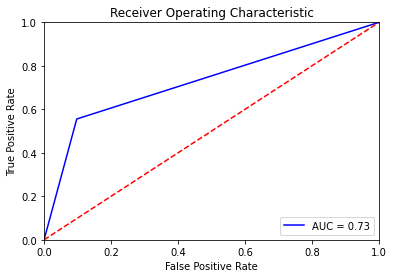

In [15]:
plot_auc_roc(model)

In [16]:
# precision, recall, f1-score, auc 까지 평가지표임
# 죽음과 관련된 지표는 recall을 확인
# 추천과 관련된 지표는 precision
# f1은 단독지표로 나오지 않음 / 애매하게 선택하기 어려울 때 f1 / 둘 다 좋은 지표인데 f1이 조화롭지 않는가
# 분류문제 일 때는 auc와 roc 모델을 확인한다. - 성능이 좋으면 커브가 잘 나온다. - 면적이 1로 만들어지는 게 베스트

In [17]:
# scale을 하고 split을 했는데도 성능이 안나오면 데이터 셋에 문제가 있는 것임

In [19]:
# 전처리를 어떻게 했는지 꼭 적기

In [ ]:
## 복습하면서 이거 성능 높여보기 스케일, 스플릿